In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("C://Users//Ananthram Vasu//Downloads//MultipleDisease Prediction//indian_liver_patient.csv")

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [5]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
(df == 0).sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [7]:
df['Dataset'].value_counts()

Dataset
1    416
2    167
Name: count, dtype: int64

In [9]:
#Filling missing values with Most Frequent Value (Mode)
df.fillna(df.mode().iloc[0], inplace=True)

In [10]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [12]:
df1 = df.drop(columns = 'Gender')

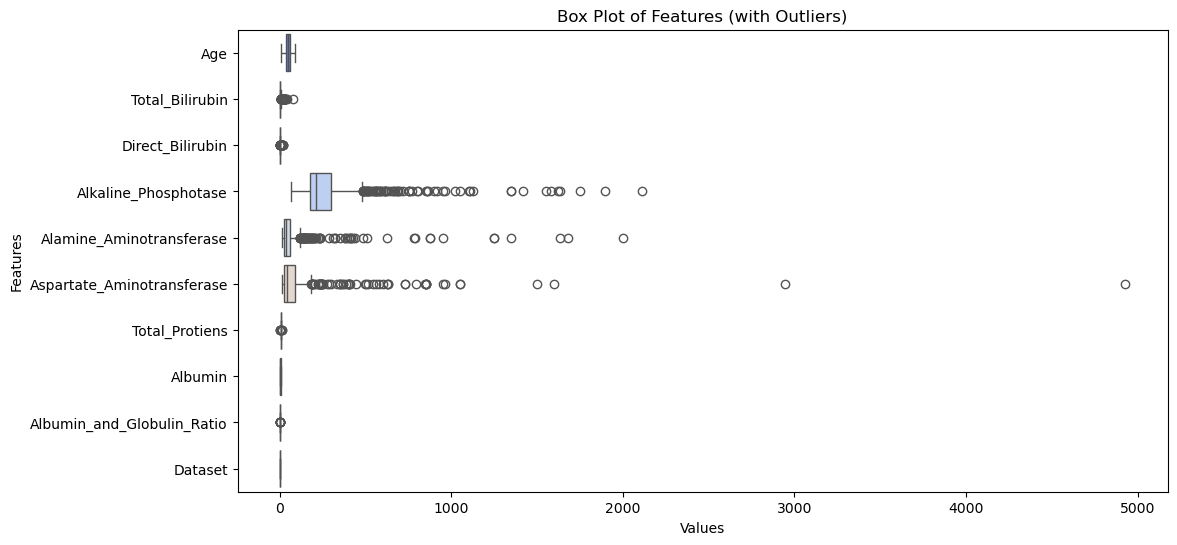

Age                            0
Total_Bilirubin               84
Direct_Bilirubin              81
Alkaline_Phosphotase          69
Alamine_Aminotransferase      73
Aspartate_Aminotransferase    66
Total_Protiens                 8
Albumin                        0
Albumin_and_Globulin_Ratio    10
Dataset                        0
dtype: int64

In [13]:
# Detect outliers using IQR
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

# Outlier conditions (values outside 1.5*IQR range)
outliers = ((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR)))

plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, orient="h", palette="coolwarm", showfliers=True)
plt.title("Box Plot of Features (with Outliers)")
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()

# Count of outliers per column
outlier_counts = outliers.sum()
outlier_counts

In [14]:
# Treating Outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping (Winsorization)
df1 = df1.copy()
df1 = df1.clip(lower=lower_bound, upper=upper_bound, axis=1)

# Verify if outliers are capped
outliers_after = ((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).sum()
outliers_after

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

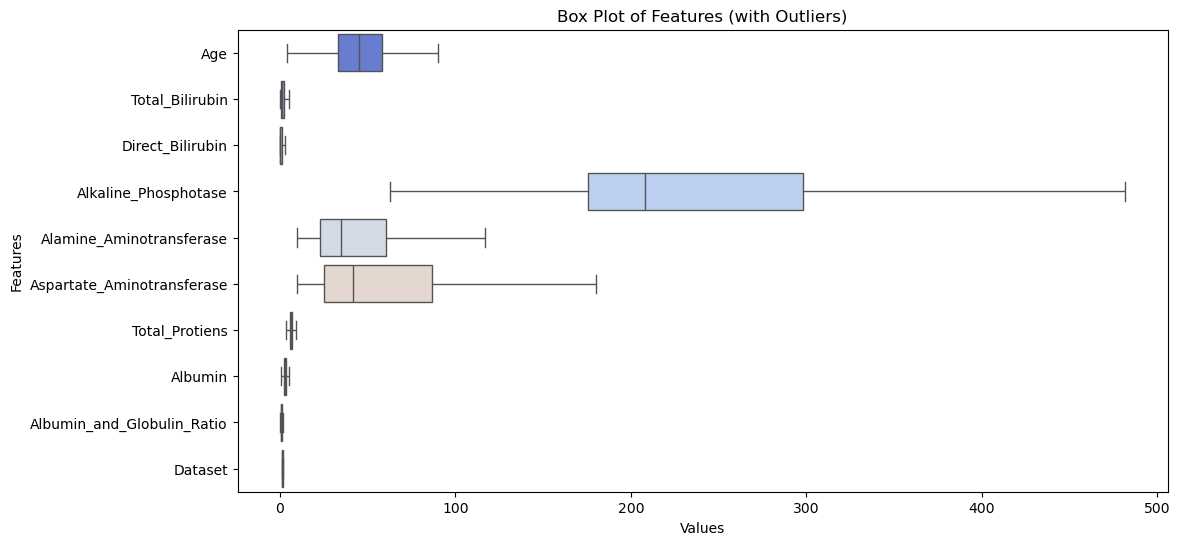

In [15]:
#visulaizing after outlier treatment
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, orient="h", palette="coolwarm", showfliers=True)
plt.title("Box Plot of Features (with Outliers)")
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()

In [18]:
df2 = pd.concat([df1, df["Gender"]], axis=1)
df2

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender
0,65,0.7,0.10,187.00,16.0,18,6.8,3.3,0.90,1,Female
1,62,5.3,2.95,481.75,64.0,100,7.5,3.2,0.74,1,Male
2,62,5.3,2.95,481.75,60.0,68,7.0,3.3,0.89,1,Male
3,58,1.0,0.40,182.00,14.0,20,6.8,3.4,1.00,1,Male
4,72,3.9,2.00,195.00,27.0,59,7.3,2.4,0.40,1,Male
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.10,481.75,20.0,34,5.9,1.6,0.37,2,Male
579,40,0.6,0.10,98.00,35.0,31,6.0,3.2,1.10,1,Male
580,52,0.8,0.20,245.00,48.0,49,6.4,3.2,1.00,1,Male
581,31,1.3,0.50,184.00,29.0,32,6.8,3.4,1.00,1,Male


In [16]:
df['Gender'].value_counts()

Gender
Male      441
Female    142
Name: count, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the Gender column
df2["Gender"] = le.fit_transform(df2["Gender"])

# Check encoding
print(df2["Gender"].value_counts())
# 0 for femals and 1 for male

Gender
1    441
0    142
Name: count, dtype: int64


In [21]:
df2.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset',
       'Gender'],
      dtype='object')

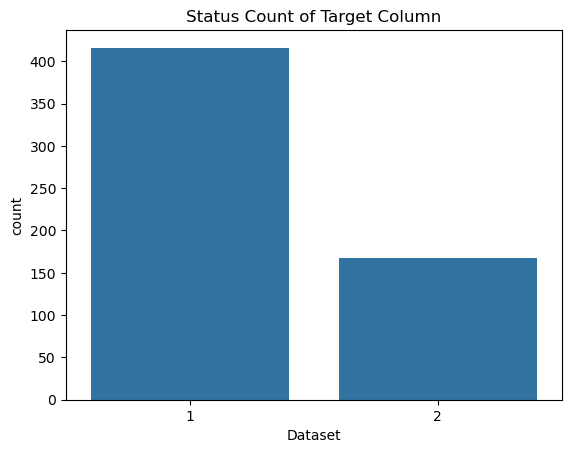

In [22]:
#1. Target Variable (Dataset) Distribution
sns.countplot(x='Dataset', data=df2)
plt.title("Status Count of Target Column")
plt.show()

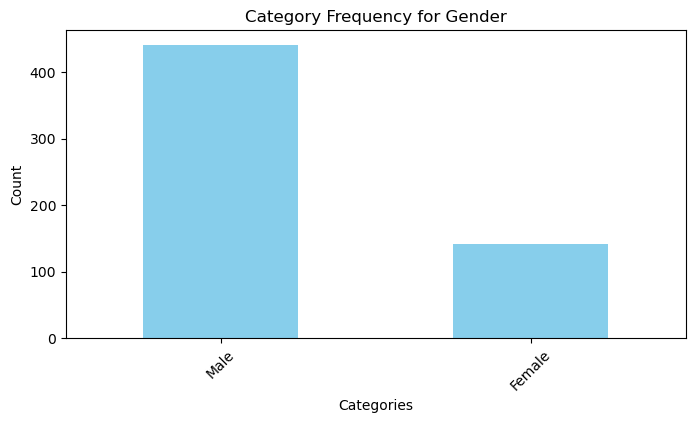

In [17]:
df['Gender'].value_counts().plot(kind='bar', figsize=(8, 4), color='skyblue')
plt.title("Category Frequency for Gender")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

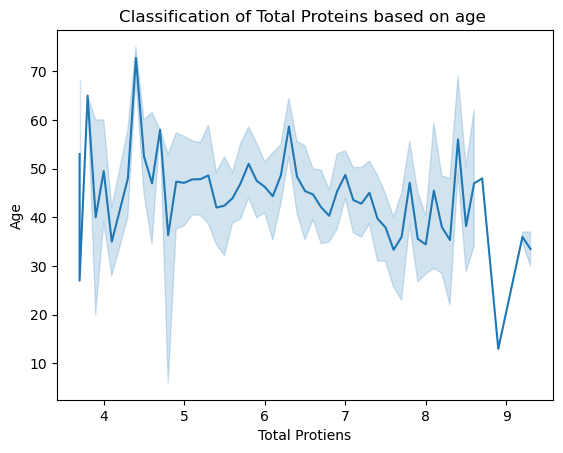

In [28]:
plt.title("Classification of Total Proteins based on age ")
sns.lineplot(data = df2, y = 'Age', x = 'Total_Protiens')
plt.ylabel("Age")
plt.xlabel("Total Protiens")

plt.show()

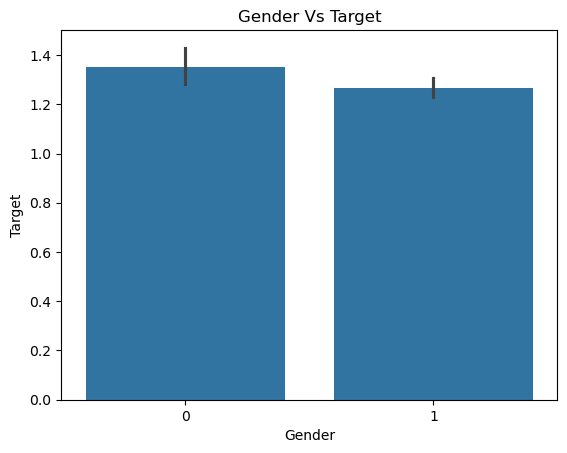

In [30]:
plt.title("Gender Vs Target")
sns.barplot(data = df2, x = 'Gender', y = 'Dataset')
plt.xlabel("Gender")
plt.ylabel("Target")
plt.show()

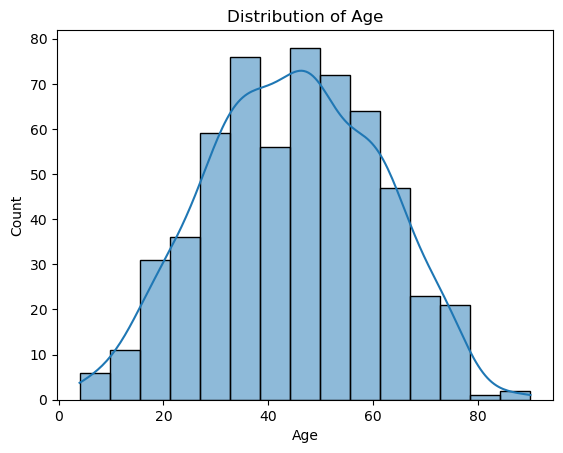

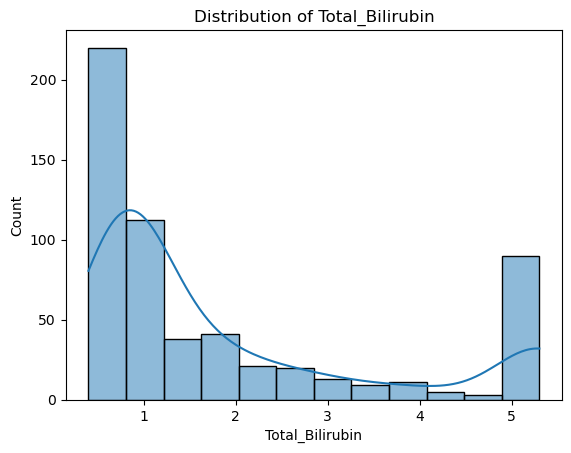

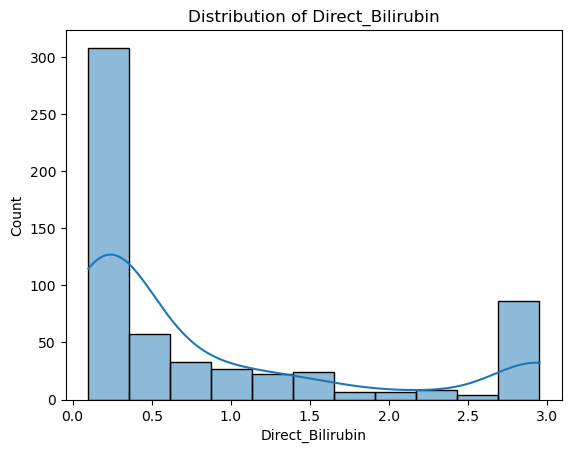

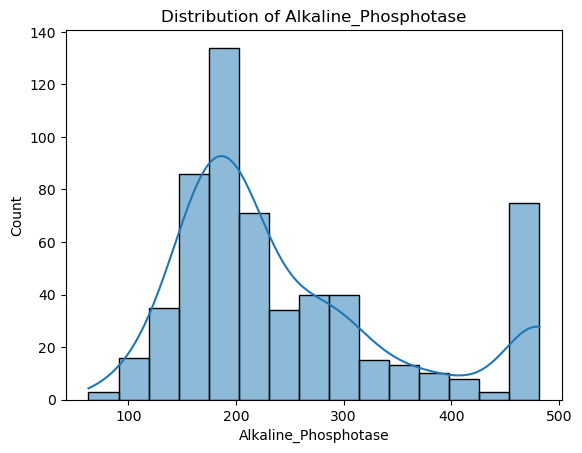

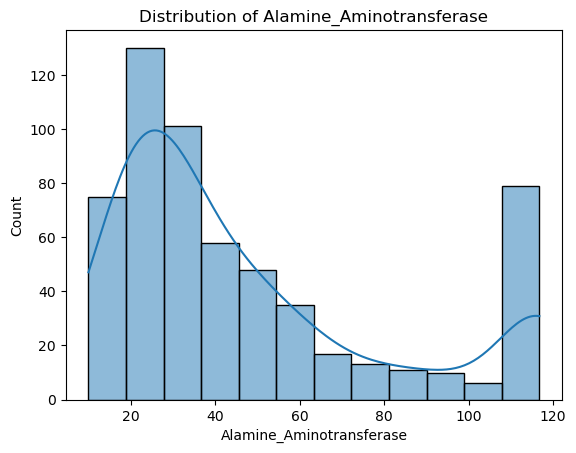

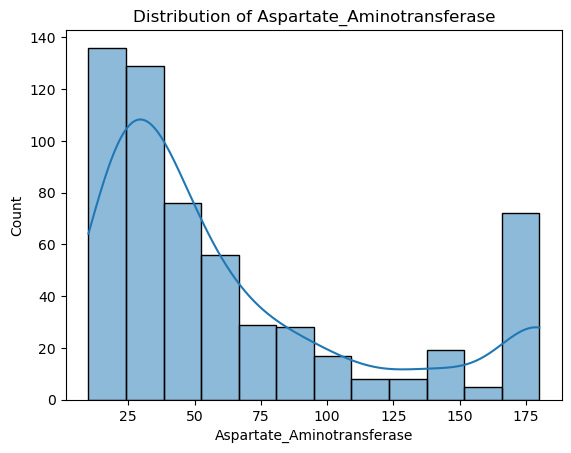

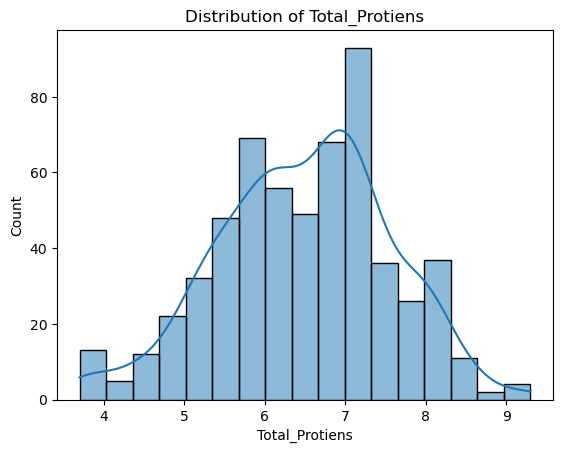

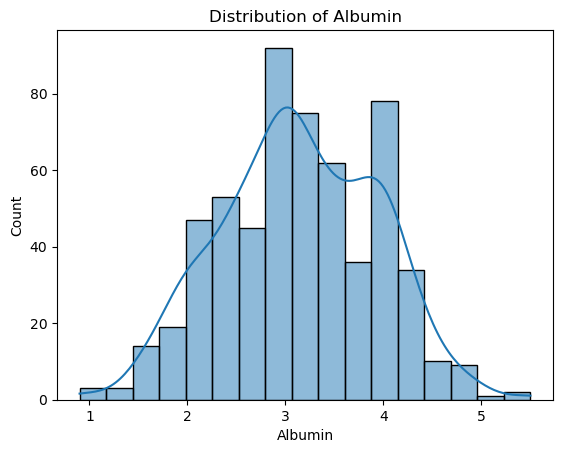

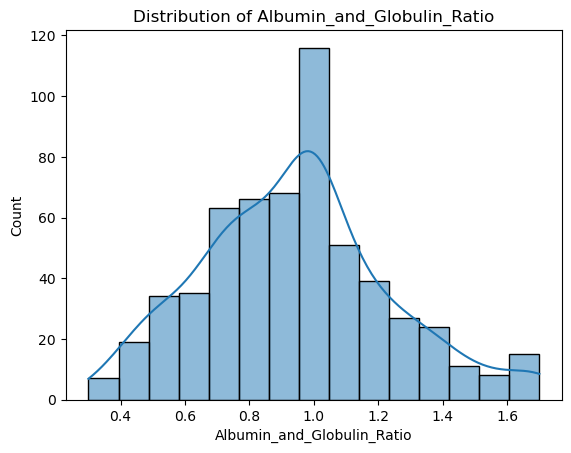

KeyError: 'Gender'

In [33]:
features = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio','Gender']
for col in features:
    sns.histplot(df1[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

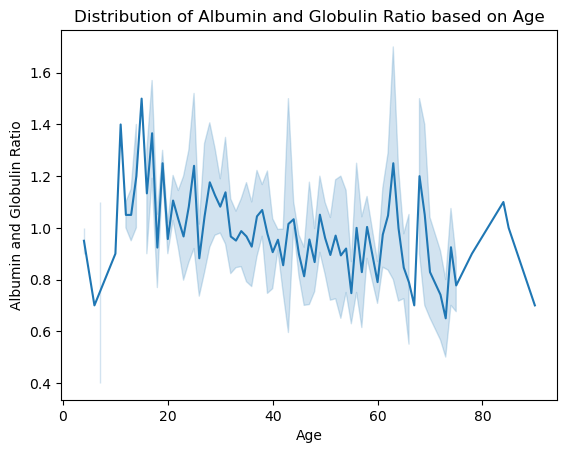

In [36]:
plt.title("Distribution of Albumin and Globulin Ratio based on Age")
sns.lineplot(data = df2, y = 'Albumin_and_Globulin_Ratio', x = 'Age')
plt.ylabel("Albumin and Globulin Ratio")
plt.xlabel("Age")
plt.show()

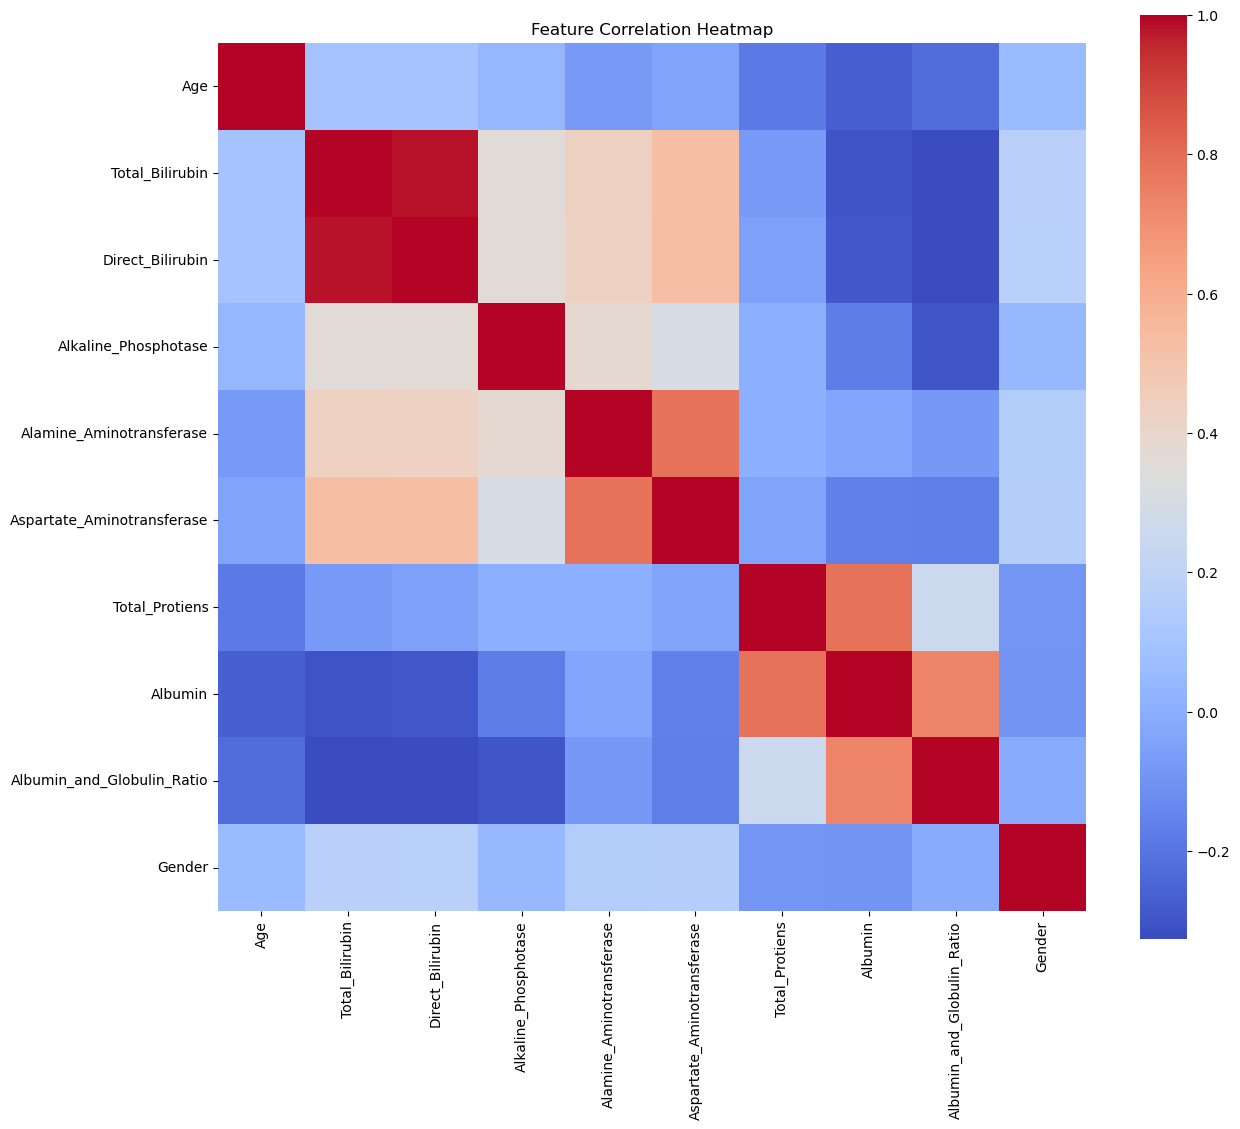

In [37]:
plt.figure(figsize=(14, 12))
corr = df2.drop('Dataset', axis=1).corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [38]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [39]:
# Split original data
X = df2.drop('Dataset', axis=1)
y = df2['Dataset']

# Train-test split (before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to training data only
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [40]:
#Checking the resampled class balance of the target column
print(pd.Series(y_train_resampled).value_counts())

Dataset
1    333
2    333
Name: count, dtype: int64


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [42]:
lgr = LogisticRegression()
lgr.fit(X_train_resampled, y_train_resampled)

A:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
lgr.score(X_train_resampled, y_train_resampled)

0.7087087087087087

In [45]:
rfc = RandomForestClassifier()
rfc.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [46]:
rfc.score(X_train_resampled, y_train_resampled)

1.0

In [47]:
knnc = KNeighborsClassifier()
knnc.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [48]:
knnc.score(X_train_resampled, y_train_resampled)

0.8273273273273273

In [49]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier()

In [50]:
gbc.score(X_train_resampled, y_train_resampled)

0.9534534534534534

In [51]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [52]:
dtc.score(X_train_resampled, y_train_resampled)

1.0

In [53]:
prediction = rfc.predict(X_test)

In [54]:
for i in prediction:
    print(["Liver Disease Consult with a Doctor" if i == 1 else "No liver Disease Predicted" ])

['No liver Disease Predicted']
['No liver Disease Predicted']
['No liver Disease Predicted']
['No liver Disease Predicted']
['No liver Disease Predicted']
['Liver Disease Consult with a Doctor']
['No liver Disease Predicted']
['No liver Disease Predicted']
['Liver Disease Consult with a Doctor']
['Liver Disease Consult with a Doctor']
['Liver Disease Consult with a Doctor']
['Liver Disease Consult with a Doctor']
['No liver Disease Predicted']
['No liver Disease Predicted']
['No liver Disease Predicted']
['No liver Disease Predicted']
['No liver Disease Predicted']
['No liver Disease Predicted']
['Liver Disease Consult with a Doctor']
['No liver Disease Predicted']
['No liver Disease Predicted']
['Liver Disease Consult with a Doctor']
['No liver Disease Predicted']
['Liver Disease Consult with a Doctor']
['No liver Disease Predicted']
['Liver Disease Consult with a Doctor']
['Liver Disease Consult with a Doctor']
['Liver Disease Consult with a Doctor']
['Liver Disease Consult with a Do

In [55]:
import pickle
with open('liverdisease_best_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)
print("DataFrame saved as pickle file.")

DataFrame saved as pickle file.
